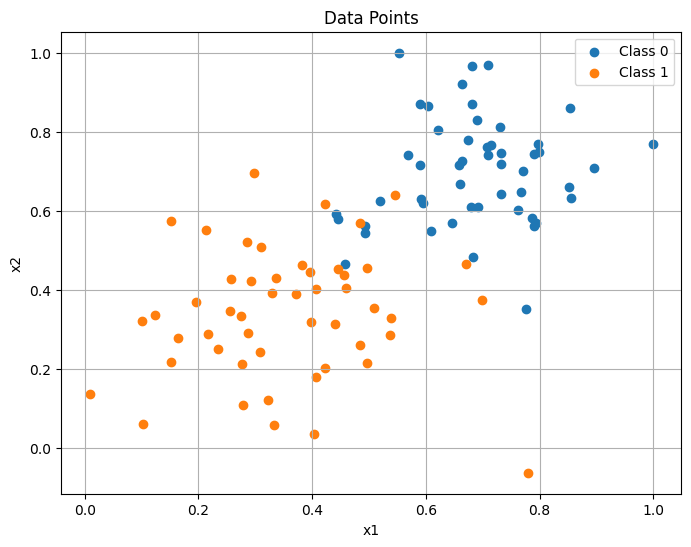

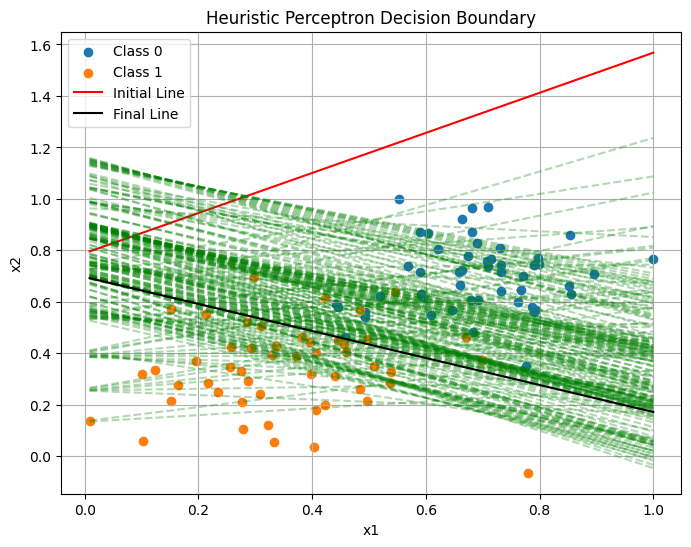

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("data.csv", header=None)
X = df.iloc[:, :2].values  # Features (x1, x2)
y = df.iloc[:, 2].values   # Labels

# Plot the data
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Class {label}')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Data Points")
plt.legend()
plt.grid(True)
plt.show()

def heuristic_perceptron(X, y, learning_rate=0.1, max_iter=50):
    w = np.random.randn(2)
    b = np.random.randn()
    lines = []

    for iteration in range(max_iter):
        error_count = 0
        for i in range(len(X)):
            xi = X[i]
            yi = y[i]
            linear_output = np.dot(w, xi) + b
            y_pred = 1 if linear_output >= 0 else 0
            error = yi - y_pred

            if error != 0:
                w += learning_rate * error * xi
                b += learning_rate * error
                lines.append((w.copy(), b))
                error_count += 1

        if error_count == 0:
            break
    return w, b, lines

def plot_with_boundaries(X, y, lines, final_w, final_b):
    plt.figure(figsize=(8, 6))
    for label in np.unique(y):
        plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Class {label}')

    x_vals = np.linspace(X[:,0].min(), X[:,0].max(), 100)

    if lines:
        # Initial line (red)
        w0, b0 = lines[0]
        y_vals = -(w0[0] * x_vals + b0) / w0[1]
        plt.plot(x_vals, y_vals, 'r-', label='Initial Line')

        # Update lines (green dashed)
        for w, b in lines[1:-1]:
            y_vals = -(w[0] * x_vals + b) / w[1]
            plt.plot(x_vals, y_vals, 'g--', alpha=0.3)

    # Final line (black)
    y_vals = -(final_w[0] * x_vals + final_b) / final_w[1]
    plt.plot(x_vals, y_vals, 'k-', label='Final Line')

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Heuristic Perceptron Decision Boundary")
    plt.legend()
    plt.grid(True)
    plt.show()

final_w, final_b, lines = heuristic_perceptron(X, y, learning_rate=0.1)
plot_with_boundaries(X, y, lines, final_w, final_b)


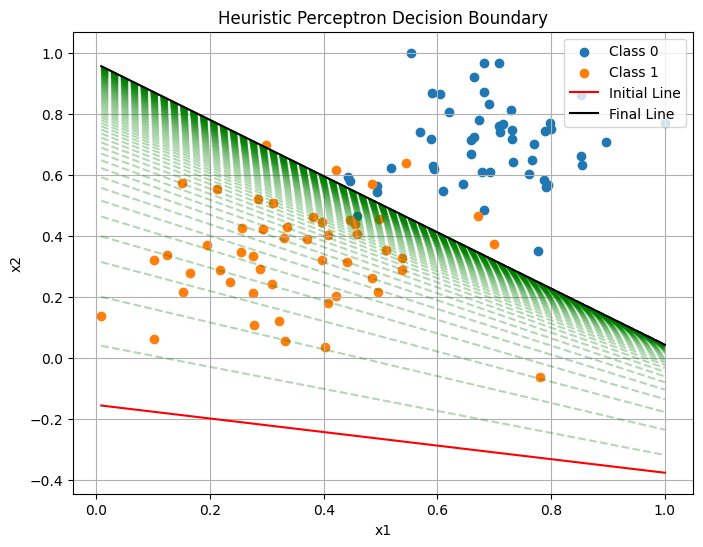

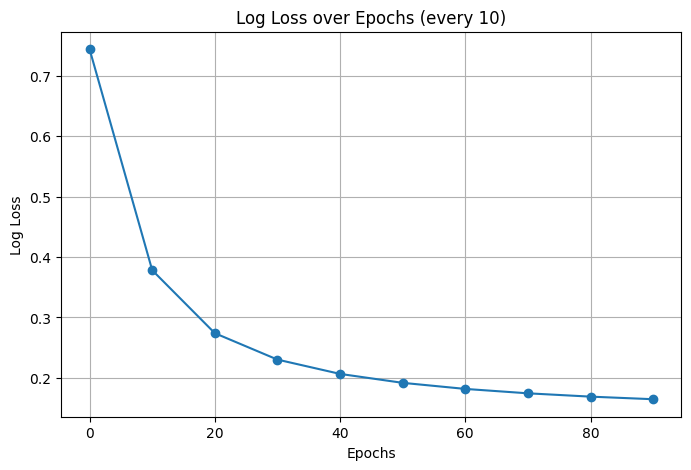

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(y_true, y_pred):
    eps = 1e-15  # avoid log(0)
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def gradient_descent_perceptron(X, y, learning_rate=0.1, epochs=100):
    w = np.random.randn(2)
    b = np.random.randn()
    boundary_lines = []
    log_losses = []

    for epoch in range(epochs):
        for i in range(len(X)):
            xi = X[i]
            yi = y[i]
            z = np.dot(w, xi) + b
            y_pred = sigmoid(z)
            error = yi - y_pred
            w += learning_rate * error * xi
            b += learning_rate * error

        # Store boundary after each epoch
        boundary_lines.append((w.copy(), b))

        # Store log loss every 10 epochs
        if epoch % 10 == 0:
            preds = sigmoid(np.dot(X, w) + b)
            loss = log_loss(y, preds)
            log_losses.append((epoch, loss))

    return w, b, boundary_lines, log_losses

final_w2, final_b2, lines2, losses = gradient_descent_perceptron(X, y, learning_rate=0.1, epochs=100)
plot_with_boundaries(X, y, lines2, final_w2, final_b2)

epochs_logged, loss_vals = zip(*losses)

plt.figure(figsize=(8, 5))
plt.plot(epochs_logged, loss_vals, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Log Loss over Epochs (every 10)")
plt.grid(True)
plt.show()
